In [1]:
import os

# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
train_df = pd.read_csv(r"/content/dual-stage-toxic-comment-detection-system/raw_data/jigsaw-toxic-comment-classification-challenge/train/train.csv")
test_df = pd.read_csv(r"/content/dual-stage-toxic-comment-detection-system/raw_data/jigsaw-toxic-comment-classification-challenge/test/test.csv")

In [15]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [16]:
sum_labels=train_df.iloc[:,2:].sum()
print(sum_labels)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


### Creation of Label feature

In [17]:
row_sum=train_df.iloc[:,2:].sum(axis=1)
train_df['Label']=(row_sum==0)

In [18]:
print(train_df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Label            0
dtype: int64


In [19]:
print(train_df[train_df['Label'] == False])

                      id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
42      001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
...                  ...                                                ...   
159494  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159546  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insul

In [20]:
print(test_df.isnull().sum())

id              0
comment_text    0
dtype: int64


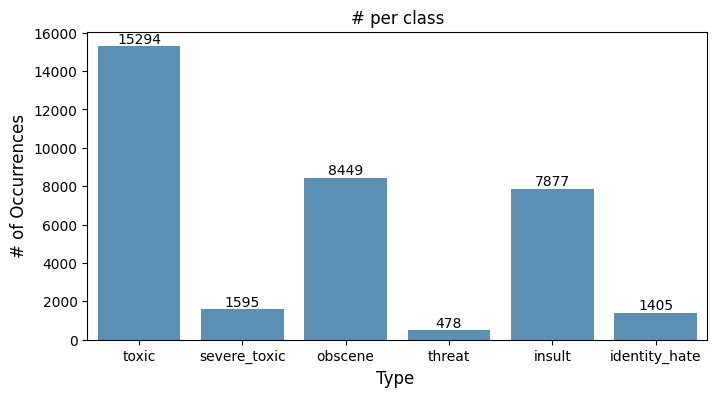

In [21]:
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=sum_labels.index, y=sum_labels.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = sum_labels.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

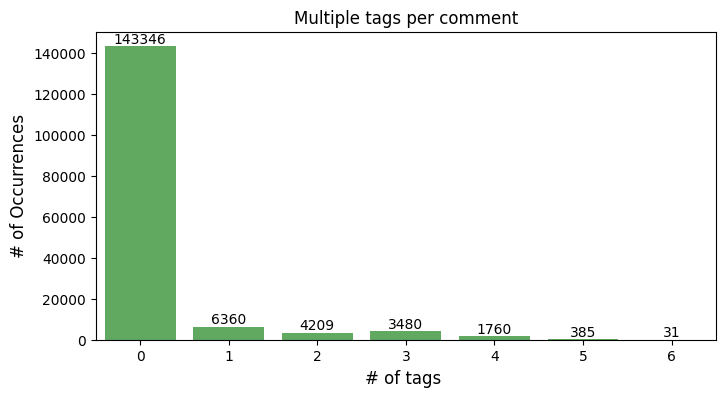

In [22]:
color = sns.color_palette()

x=row_sum.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [23]:
temp_df=train_df.iloc[:,2:-1]

# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

In [24]:
stopwords = set(stopwords.words('english'))

In [25]:
combined_df = pd.concat([train_df.iloc[:, :2], test_df.iloc[:, :2]], axis=0)
df = combined_df.reset_index(drop=True)

In [26]:
print(combined_df)

                      id                                       comment_text
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[312735 rows x 2 columns]


In [27]:
print(df)

                      id                                       comment_text
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...
...                  ...                                                ...
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[312735 rows x 2 columns]


In [28]:
import string

# Feature Engineering

In [30]:
# Indirect Textual Features

# Count sentences based on newline characters in each comment
df['sentence_count'] = df['comment_text'].apply(lambda text: str(text).count('\n') + 1)

# Count total words in each comment
df['word_count'] = df['comment_text'].apply(lambda text: len(str(text).split()))

# Count unique words in each comment
df['unique_word_count'] = df['comment_text'].apply(lambda text: len(set(str(text).split())))

# Count total letters (characters) in each comment
df['letter_count'] = df['comment_text'].apply(lambda text: len(str(text)))

# Count punctuation marks in each comment
df['punctuation_count'] = df['comment_text'].apply(
    lambda text: sum(1 for char in str(text) if char in string.punctuation)
)

# Count uppercase words in each comment
df['uppercase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.isupper())
)

# Count title-case words in each comment
df['titlecase_word_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).split() if word.istitle())
)

# Count stopwords in each comment
df['stopword_count'] = df['comment_text'].apply(
    lambda text: sum(1 for word in str(text).lower().split() if word in stopwords)
)

df['avg_word_length'] = df['comment_text'].apply(
    lambda text: np.mean([len(word) for word in str(text).split()]) if str(text).split() else 0
)


In [31]:
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
312730  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
312731  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
312732  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
312733  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
312734  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [32]:
# Calculating the percentage of unique words per comment
df['unique_word_ratio'] = (df['unique_word_count'] / df['word_count']) * 100

# Calculating the percentage of punctuation marks per comment
df['punctuation_ratio'] = (df['punctuation_count'] / df['word_count']) * 100


In [33]:
# Splitting dataset into training and testing feature sets
train_data_features = df[:train_df.shape[0]].reset_index(drop=True)
test_data_features = df[train_df.shape[0]:].reset_index(drop=True)

print(train_data_features)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

In [34]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [35]:
# Extracting labels from the training data
label_columns = train_df.iloc[:, 2:].reset_index(drop=True)

print(label_columns)

# Combining training features and labels into a single DataFrame
combined_training_data = pd.concat([train_data_features, label_columns], axis=1)

        toxic  severe_toxic  obscene  threat  insult  identity_hate  Label
0           0             0        0       0       0              0   True
1           0             0        0       0       0              0   True
2           0             0        0       0       0              0   True
3           0             0        0       0       0              0   True
4           0             0        0       0       0              0   True
...       ...           ...      ...     ...     ...            ...    ...
159566      0             0        0       0       0              0   True
159567      0             0        0       0       0              0   True
159568      0             0        0       0       0              0   True
159569      0             0        0       0       0              0   True
159570      0             0        0       0       0              0   True

[159571 rows x 7 columns]


In [36]:
print(combined_training_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        sentence_count  word_count  unique_word_cou

# Text Preprocessing

In [37]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Apply preprocessing
combined_training_data["clean_comment"] = train_df['comment_text'].apply(preprocess_text)
test_data_features['clean_comment'] = test_df['comment_text'].apply(preprocess_text)

In [38]:
# Extract features and labels
X = combined_training_data["clean_comment"]
y = combined_training_data["Label"]  # Binary classification (toxic vs. non-toxic)

# Building the models

## Binary Classification Models

### Splitting of the dataset

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### TF-IDF Vectors

In [41]:
# Convert text data into numerical vectors using TF-IDF
tfidf = TfidfVectorizer(max_features=15000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

### Baseline ML Models

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

In [43]:
# Transform test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf.transform(test_data_features["clean_comment"])

### Training the models

Training Logistic Regression...
Logistic Regression is fit to the training data
Validated the model
Accuracy of Logistic Regression 0.9555068149772834
classification_report of Logistic Regression               precision    recall  f1-score   support

       False       0.93      0.61      0.74      3245
        True       0.96      0.99      0.98     28670

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.86     31915
weighted avg       0.95      0.96      0.95     31915

confusion_matrix of Logistic Regression [[ 1980  1265]
 [  155 28515]]
Updated the Logistic Regression results


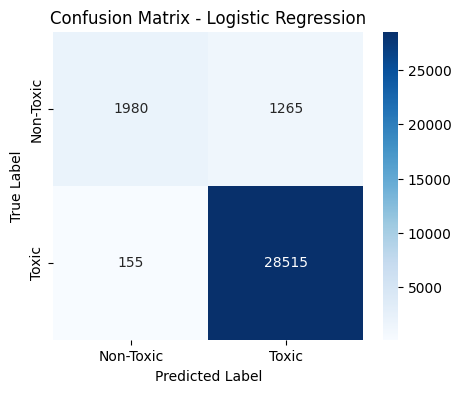

Logistic Regression Predictions done for test data
Training Naive Bayes...
Naive Bayes is fit to the training data
Validated the model
Accuracy of Naive Bayes 0.9472348425505248
classification_report of Naive Bayes               precision    recall  f1-score   support

       False       0.94      0.51      0.66      3245
        True       0.95      1.00      0.97     28670

    accuracy                           0.95     31915
   macro avg       0.95      0.75      0.82     31915
weighted avg       0.95      0.95      0.94     31915

confusion_matrix of Naive Bayes [[ 1661  1584]
 [  100 28570]]
Updated the Naive Bayes results


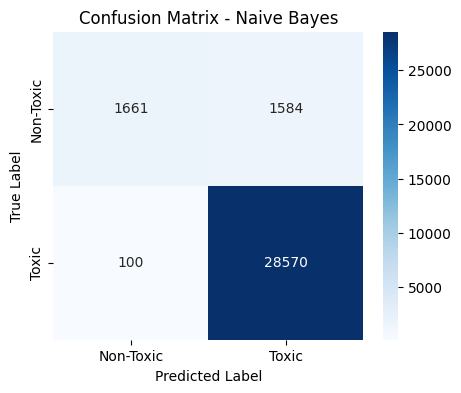

Naive Bayes Predictions done for test data
Training Random Forest...
Random Forest is fit to the training data
Validated the model
Accuracy of Random Forest 0.9556008146639511
classification_report of Random Forest               precision    recall  f1-score   support

       False       0.85      0.68      0.76      3245
        True       0.97      0.99      0.98     28670

    accuracy                           0.96     31915
   macro avg       0.91      0.84      0.87     31915
weighted avg       0.95      0.96      0.95     31915

confusion_matrix of Random Forest [[ 2221  1024]
 [  393 28277]]
Updated the Random Forest results


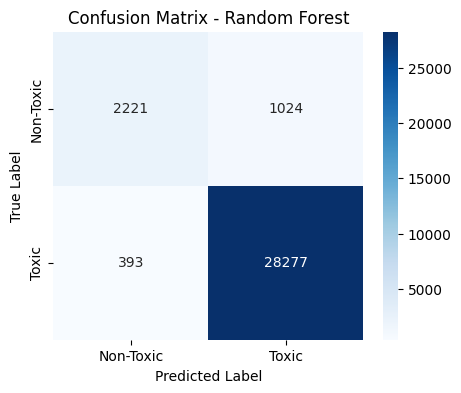

Random Forest Predictions done for test data
Training XGBoost...
XGBoost is fit to the training data
Validated the model
Accuracy of XGBoost 0.9522168259439135
classification_report of XGBoost               precision    recall  f1-score   support

       False       0.91      0.59      0.71      3245
        True       0.95      0.99      0.97     28670

    accuracy                           0.95     31915
   macro avg       0.93      0.79      0.84     31915
weighted avg       0.95      0.95      0.95     31915

confusion_matrix of XGBoost [[ 1902  1343]
 [  182 28488]]
Updated the XGBoost results


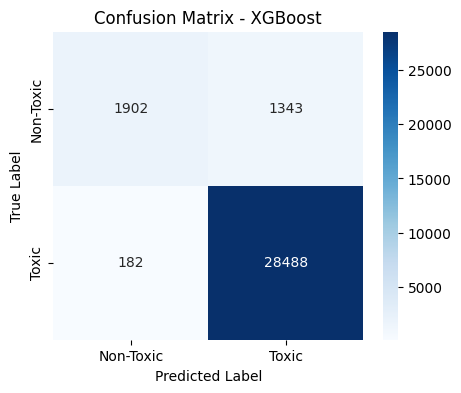

XGBoost Predictions done for test data


In [46]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    print(f"{model_name} is fit to the training data")
    y_val_pred = model.predict(X_val_tfidf)
    print("Validated the model")
    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy of {model_name}", accuracy)
    classification_rep = classification_report(y_val, y_val_pred)
    print(f"classification_report of {model_name}", classification_rep)
    conf_matrix = sk_confusion_matrix(y_val, y_val_pred)
    print(f"confusion_matrix of {model_name}", conf_matrix)

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": conf_matrix
    }
    print(f"Updated the {model_name} results")
    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Toxic", "Toxic"], yticklabels=["Non-Toxic", "Toxic"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    test_data_features[f"predicted_{model_name.replace(' ', '_')}"] = model.predict(X_test_tfidf)

    print(f"{model_name} Predictions done for test data")

### Results

In [48]:
print(results)

{'Logistic Regression': {'accuracy': 0.9555068149772834, 'classification_report': '              precision    recall  f1-score   support\n\n       False       0.93      0.61      0.74      3245\n        True       0.96      0.99      0.98     28670\n\n    accuracy                           0.96     31915\n   macro avg       0.94      0.80      0.86     31915\nweighted avg       0.95      0.96      0.95     31915\n', 'confusion_matrix': array([[ 1980,  1265],
       [  155, 28515]])}, 'Naive Bayes': {'accuracy': 0.9472348425505248, 'classification_report': '              precision    recall  f1-score   support\n\n       False       0.94      0.51      0.66      3245\n        True       0.95      1.00      0.97     28670\n\n    accuracy                           0.95     31915\n   macro avg       0.95      0.75      0.82     31915\nweighted avg       0.95      0.95      0.94     31915\n', 'confusion_matrix': array([[ 1661,  1584],
       [  100, 28570]])}, 'Random Forest': {'accuracy': 0

In [49]:
# Convert results dictionary into a structured DataFrame
model_results = {
    "Model": [],
    "Accuracy": [],
    "Precision (False)": [],
    "Recall (False)": [],
    "F1-Score (False)": [],
    "Precision (True)": [],
    "Recall (True)": [],
    "F1-Score (True)": [],
    "False Positives": [],
    "False Negatives": []
}

# Populate the table with results
for model_name, metrics in results.items():
    report_lines = metrics["classification_report"].split("\n")
    false_metrics = list(map(float, report_lines[2].split()[1:]))
    true_metrics = list(map(float, report_lines[3].split()[1:]))
    conf_matrix = metrics["confusion_matrix"]

    model_results["Model"].append(model_name)
    model_results["Accuracy"].append(metrics["accuracy"])
    model_results["Precision (False)"].append(false_metrics[0])
    model_results["Recall (False)"].append(false_metrics[1])
    model_results["F1-Score (False)"].append(false_metrics[2])
    model_results["Precision (True)"].append(true_metrics[0])
    model_results["Recall (True)"].append(true_metrics[1])
    model_results["F1-Score (True)"].append(true_metrics[2])
    model_results["False Positives"].append(conf_matrix[0][1])
    model_results["False Negatives"].append(conf_matrix[1][0])

In [50]:
# Convert to DataFrame for display
results_df = pd.DataFrame(model_results)

In [51]:
print(results_df)

                 Model  Accuracy  Precision (False)  Recall (False)  \
0  Logistic Regression  0.955507               0.93            0.61   
1          Naive Bayes  0.947235               0.94            0.51   
2        Random Forest  0.955601               0.85            0.68   
3              XGBoost  0.952217               0.91            0.59   

   F1-Score (False)  Precision (True)  Recall (True)  F1-Score (True)  \
0              0.74              0.96           0.99             0.98   
1              0.66              0.95           1.00             0.97   
2              0.76              0.97           0.99             0.98   
3              0.71              0.95           0.99             0.97   

   False Positives  False Negatives  
0             1265              155  
1             1584              100  
2             1024              393  
3             1343              182  


### Applying the model to test dataset

In [52]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [53]:
print(combined_training_data.iloc[:, 13:19])

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]


In [54]:
# Proceed with training and evaluation again
X = combined_training_data["clean_comment"]
y = combined_training_data.iloc[:, 13:19]  # Multi-label classification

## Multi-label Classification

In [55]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline ML Models

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# Define models for multi-label classification
multiclass_models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=500)),
    "Naive Bayes": OneVsRestClassifier(MultinomialNB()),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1, random_state=42)),
    "XGBoost": OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
}

### Training the models

In [ ]:
# Train and evaluate each model
results_multi_class = {}
for model_name, model in multiclass_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_val_pred = model.predict(X_val_tfidf)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    classification_rep = classification_report(y_val, y_val_pred, target_names=y.columns)

    # Store results
    results_multi_class[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
    }

    test_pred = model.predict(X_test_tfidf)
    for i, col in enumerate(y.columns):
        test_data_features[f"predicted_multi-class_{col}_{model_name.replace(' ', '_')}"] = test_pred[:, i]

Training Logistic Regression...


c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Training Naive Bayes...


c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Training Random Forest...


c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Training XGBoost...


c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:21:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:14] WARNING: C:\actions-r

### Results

In [ ]:
print(results_multi_class)

{'Logistic Regression': {'accuracy': 0.898355005483315, 'classification_report': '               precision    recall  f1-score   support\n\n        toxic       0.00      0.00      0.00      3056\n severe_toxic       0.00      0.00      0.00       321\n      obscene       0.00      0.00      0.00      1715\n       threat       0.00      0.00      0.00        74\n       insult       0.00      0.00      0.00      1614\nidentity_hate       0.00      0.00      0.00       294\n\n    micro avg       0.00      0.00      0.00      7074\n    macro avg       0.00      0.00      0.00      7074\n weighted avg       0.00      0.00      0.00      7074\n  samples avg       0.00      0.00      0.00      7074\n'}, 'Naive Bayes': {'accuracy': 0.8982296725677581, 'classification_report': '               precision    recall  f1-score   support\n\n        toxic       0.00      0.00      0.00      3056\n severe_toxic       0.00      0.00      0.00       321\n      obscene       0.00      0.00      0.00      

### Applying the model to test dataset

In [ ]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

In [ ]:
# Function to create a "Predicted Tags" column for each model
def generate_predicted_tags(df, model_names, label_columns):
    for model in model_names:
        model_cols = [f"predicted_multi-class_{label}_{model}" for label in label_columns]
        df[f"predicted_tags_{model}"] = df[model_cols].apply(
            lambda row: ", ".join([label for label, val in zip(label_columns, row) if val == 1]), axis=1
        )
        # If no labels are predicted, assign 'None'
        df[f"predicted_tags_{model}"] = df[f"predicted_tags_{model}"].replace("", "None")

# Define model names and label categories
model_names = ["Logistic_Regression", "Naive_Bayes", "Random_Forest", "XGBoost"]
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Generate predicted tags for each model
generate_predicted_tags(test_data_features, model_names, label_columns)

In [ ]:
print(test_data_features)

                      id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        sentence_count  word_count  unique_word_cou

### Analysis of multi-label classification

In [ ]:
filtered_df = test_data_features[
    (test_data_features["predicted_tags_Logistic_Regression"] != "None") |
    (test_data_features["predicted_tags_Naive_Bayes"] != "None") |
    (test_data_features["predicted_tags_Random_Forest"] != "None") |
    (test_data_features["predicted_tags_XGBoost"] != "None")
]

In [ ]:
print(test_data_features[(test_data_features["predicted_tags_Logistic_Regression"] != "None")])

Empty DataFrame
Columns: [id, comment_text, sentence_count, word_count, unique_word_count, letter_count, punctuation_count, uppercase_word_count, titlecase_word_count, stopword_count, avg_word_length, unique_word_ratio, punctuation_ratio, clean_comment, predicted_Logistic_Regression, predicted_Naive_Bayes, predicted_Random_Forest, predicted_XGBoost, predicted_multi-class_toxic_Logistic_Regression, predicted_multi-class_severe_toxic_Logistic_Regression, predicted_multi-class_obscene_Logistic_Regression, predicted_multi-class_threat_Logistic_Regression, predicted_multi-class_insult_Logistic_Regression, predicted_multi-class_identity_hate_Logistic_Regression, predicted_multi-class_toxic_Naive_Bayes, predicted_multi-class_severe_toxic_Naive_Bayes, predicted_multi-class_obscene_Naive_Bayes, predicted_multi-class_threat_Naive_Bayes, predicted_multi-class_insult_Naive_Bayes, predicted_multi-class_identity_hate_Naive_Bayes, predicted_multi-class_toxic_Random_Forest, predicted_multi-class_sever

In [ ]:
print(test_data_features[(test_data_features["predicted_tags_Naive_Bayes"] != "None")])

                      id                                       comment_text  \
44971   4a96dc388366302f  你好，依据你的要求，以下是南马福建话的翻译： \n\n 原文： \n 真耶穌教會，是二十世紀...   
72992   7996b5567996a60b  FFFFF UUUUUU CCCCCC  KKKKKK =====  YOU! F UU C...   
74925   7ce7dd6c255bdaf7  == FFFFF UUUUUU CCCCCC KKKKKK ===== YOU! F UU ...   
101681  a9af74aa6e6c3793  == Tang ina mo!! ako si Mcoy Fundales  == \n\n...   
109701  b700c2af7d77a826  ==Characters in Roger Rabbit 2== \n If a Roger...   
115950  c189f044e62aad5b  SAFYHSAJXFDSH FEHF DFJ FJDHFJASDHFUE V VHEFDBF...   
131775  dc3d26e894189ac6  Companies \n 104 Films, Accentuate, Abnormally...   

        sentence_count  word_count  unique_word_count  letter_count  \
44971               29         225                133          1270   
72992               43         925                 12          4832   
74925                3        1051                 13          4976   
101681               3          34                 26           190   
109701      

In [ ]:
print(test_data_features[(test_data_features["predicted_tags_Random_Forest"] != "None")])

Empty DataFrame
Columns: [id, comment_text, sentence_count, word_count, unique_word_count, letter_count, punctuation_count, uppercase_word_count, titlecase_word_count, stopword_count, avg_word_length, unique_word_ratio, punctuation_ratio, clean_comment, predicted_Logistic_Regression, predicted_Naive_Bayes, predicted_Random_Forest, predicted_XGBoost, predicted_multi-class_toxic_Logistic_Regression, predicted_multi-class_severe_toxic_Logistic_Regression, predicted_multi-class_obscene_Logistic_Regression, predicted_multi-class_threat_Logistic_Regression, predicted_multi-class_insult_Logistic_Regression, predicted_multi-class_identity_hate_Logistic_Regression, predicted_multi-class_toxic_Naive_Bayes, predicted_multi-class_severe_toxic_Naive_Bayes, predicted_multi-class_obscene_Naive_Bayes, predicted_multi-class_threat_Naive_Bayes, predicted_multi-class_insult_Naive_Bayes, predicted_multi-class_identity_hate_Naive_Bayes, predicted_multi-class_toxic_Random_Forest, predicted_multi-class_sever

In [ ]:
print(test_data_features[(test_data_features["predicted_tags_XGBoost"] != "None")])

                      id                                       comment_text  \
24253   286d30f703ccbfcc  " \n\n == why republicans are assholes == \n\n...   
99764   a67f831782896a9f  " \n\n == Hatchment update (source) == \n\n De...   
128324  d6760aa40d9d07c1  " \n\n == Concerning the report I've been targ...   
134264  e069fb5d93b4f77f  "== I have a suggestion == \n\n Why don't we s...   
149899  fa8acb52f8028630  == Plot, tldr version  == \n\n As Prospero exp...   

        sentence_count  word_count  unique_word_count  letter_count  \
24253               92         712                373          4604   
99764                7          59                 53           342   
128324               8         278                179          1550   
134264              21         666                371          4108   
149899              15         880                380          4916   

        punctuation_count  uppercase_word_count  titlecase_word_count  \
24253                 214

In [ ]:
print(filtered_df)

                      id                                       comment_text  \
24253   286d30f703ccbfcc  " \n\n == why republicans are assholes == \n\n...   
44971   4a96dc388366302f  你好，依据你的要求，以下是南马福建话的翻译： \n\n 原文： \n 真耶穌教會，是二十世紀...   
72992   7996b5567996a60b  FFFFF UUUUUU CCCCCC  KKKKKK =====  YOU! F UU C...   
74925   7ce7dd6c255bdaf7  == FFFFF UUUUUU CCCCCC KKKKKK ===== YOU! F UU ...   
99764   a67f831782896a9f  " \n\n == Hatchment update (source) == \n\n De...   
101681  a9af74aa6e6c3793  == Tang ina mo!! ako si Mcoy Fundales  == \n\n...   
109701  b700c2af7d77a826  ==Characters in Roger Rabbit 2== \n If a Roger...   
115950  c189f044e62aad5b  SAFYHSAJXFDSH FEHF DFJ FJDHFJASDHFUE V VHEFDBF...   
128324  d6760aa40d9d07c1  " \n\n == Concerning the report I've been targ...   
131775  dc3d26e894189ac6  Companies \n 104 Films, Accentuate, Abnormally...   
134264  e069fb5d93b4f77f  "== I have a suggestion == \n\n Why don't we s...   
149899  fa8acb52f8028630  == Plot, tldr version  == 